In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN, Birch


In [6]:
df = pd.read_csv('menu.csv')
df

,Category,Item,Serving Size,Calories,Trans Fat,Cholesterol,Carbohydrates,Sugars,Protein,Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,0.0,260,31,3,17,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,0.0,25,30,3,18,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,0.0,45,29,2,14,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,0.0,285,30,2,21,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,0.0,50,30,2,21,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,0.5,45,80,64,12,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,1.0,55,106,85,15,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,0.0,30,53,43,8,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,1.0,60,114,103,21,0,60,6


Датасет с кластеризацией еды в маке

In [7]:
an_df = df[['Calories', 'Trans Fat', 'Cholesterol', 'Sugars']].iloc[:500]
an_df

,Calories,Trans Fat,Cholesterol,Sugars
0,300,0.0,260,3
1,250,0.0,25,3
2,370,0.0,45,2
3,450,0.0,285,2
4,400,0.0,50,2
...,...,...,...,...
255,510,0.5,45,64
256,690,1.0,55,85
257,340,0.0,30,43
258,810,1.0,60,103


Уменьшаю датасет только до вредности

In [28]:
kmeans = KMeans(n_clusters=5)
dbscan = DBSCAN()
birch = Birch(n_clusters=5)

In [29]:
kmeans.fit(an_df)
birch.fit(an_df)

Birch(n_clusters=5)

Создаю и обучаю модельки

In [31]:
mini_df_clusters = an_df.copy(deep=True)

In [76]:
mini_df_clusters['kmeans'] = kmeans.fit(an_df).labels_
mini_df_clusters['birch'] = birch.fit(an_df).labels_
mini_df_clusters

,Calories,Trans Fat,Cholesterol,Sugars,kmeans,dbscan,birch
0,300,0.0,260,3,4,-1,2
1,250,0.0,25,3,4,-1,4
2,370,0.0,45,2,4,-1,4
3,450,0.0,285,2,2,-1,2
4,400,0.0,50,2,2,-1,4
...,...,...,...,...,...,...,...
255,510,0.5,45,64,2,-1,2
256,690,1.0,55,85,1,-1,1
257,340,0.0,30,43,4,-1,4
258,810,1.0,60,103,1,-1,1


К скопированному датасету добавляю колонки с результатами кластеризации

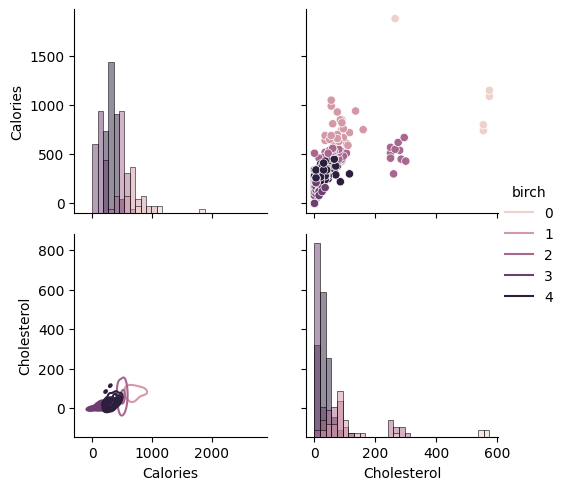

In [49]:
g = sns.PairGrid(mini_df_clusters[['Calories', 'Cholesterol', 'birch']], hue="birch")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

g.add_legend()
g

Графический резульата кластеризации, где видно, что калории и халестерин в мак мафинах связаны, необъяснимо но факт, не ешьте мак мафины, мало ли что

In [56]:
silhouette_score(mini_df_clusters[['Calories', 'Cholesterol']], mini_df_clusters['kmeans'])

0.46018293275097266

Средние растояне между кластерами довольно не велико для первой модели

In [57]:
calinski_harabasz_score(mini_df_clusters[['Calories', 'Cholesterol']], mini_df_clusters['kmeans'])

326.89332072081186

Сумма межкластерной дисперсии +- велика

In [58]:
davies_bouldin_score(mini_df_clusters[['Calories', 'Cholesterol',]], mini_df_clusters['kmeans'])

0.6313664303729041

Ну и мера сходства +- 63 процента, что не сильно лучше, чем ткнуть пальцем) (а то и пальцем лучше ткнуть)

In [59]:
silhouette_score(mini_df_clusters[['Calories', 'Cholesterol']], mini_df_clusters['birch'])

0.4472906216678817

In [61]:
calinski_harabasz_score(mini_df_clusters[['Calories', 'Cholesterol']], mini_df_clusters['birch'])

317.4892902291992

In [60]:
davies_bouldin_score(mini_df_clusters[['Calories', 'Cholesterol',]], mini_df_clusters['birch'])

0.7594210832185337

Две метрики до этой практически повторяли результаты прошлой модели, однако здесь результат значительно ещё хуже нежели в прошлой модели)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca_2 = PCA(n_components=2)

In [9]:
df_pca = pd.DataFrame(pca.fit_transform(an_df))
df_pca_2 = pd.DataFrame(pca_2.fit_transform(an_df))

In [10]:
df_pca

,0,1,2,3
0,-20.214710,216.374613,-13.451878,-0.070080
1,-122.669947,2.136961,23.019347,-0.019766
2,-1.353690,-4.957494,28.766109,-0.116256
3,131.437552,207.461383,-6.514214,-0.191500
4,28.982314,-6.776269,29.957011,-0.141186
...,...,...,...,...
255,136.593896,-47.011480,-22.674551,0.067916
256,314.614396,-80.888862,-32.783686,0.351230
257,-32.840931,-20.130620,-11.037389,-0.223452
258,433.023895,-105.793693,-43.171905,0.193912


In [62]:
df_pca_2

,0,1
0,-20.214710,216.374613
1,-122.669947,2.136961
2,-1.353690,-4.957494
3,131.437552,207.461383
4,28.982314,-6.776269
...,...,...
255,136.593896,-47.011480
256,314.614396,-80.888862
257,-32.840931,-20.130620
258,433.023895,-105.793693


Значимо понижаю размерность своего датасета, что бы помочь кластерным моделям с распределением. Но посмотрим, поможет ли

In [11]:
kmeans = KMeans(n_clusters=5)
birch = Birch(n_clusters=5)

In [12]:
kmeans.fit(an_df)
birch.fit(an_df)

Birch(n_clusters=5)

In [13]:
df_pca_clusters = df_pca.copy(deep=True)
df_pca_2_clusters = df_pca_2.copy(deep=True)

In [14]:
df_pca_clusters['kmeans'] = kmeans.fit(df_pca).labels_
df_pca_clusters['birch'] = birch.fit(df_pca).labels_

df_pca_2_clusters['kmeans'] = kmeans.fit(df_pca_2).labels_
df_pca_2_clusters['birch'] = birch.fit(df_pca_2).labels_

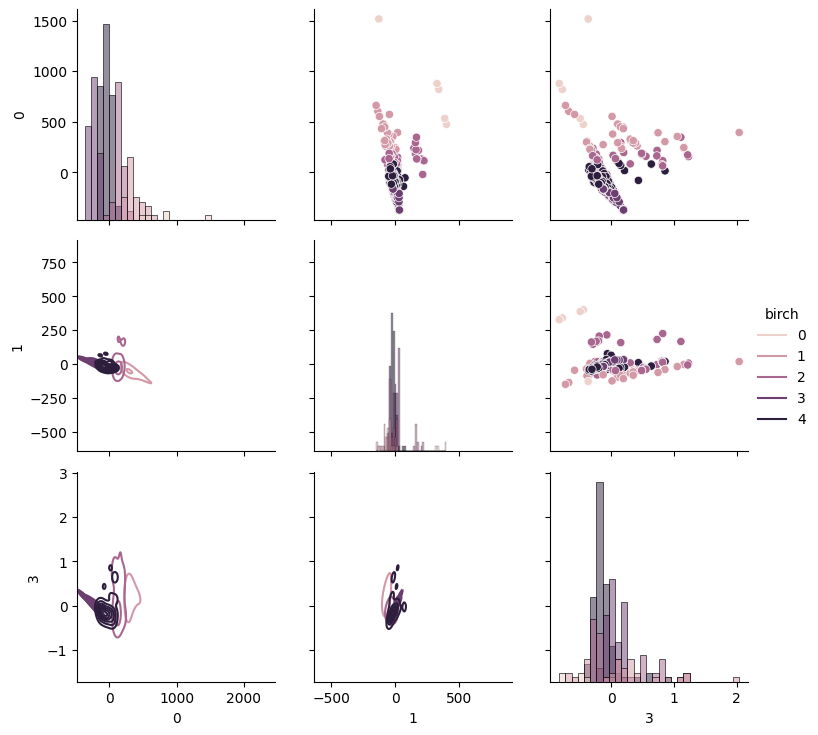

In [71]:
g = sns.PairGrid(df_pca_clusters[[0, 1, 3, 'birch']], hue='birch')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()
g

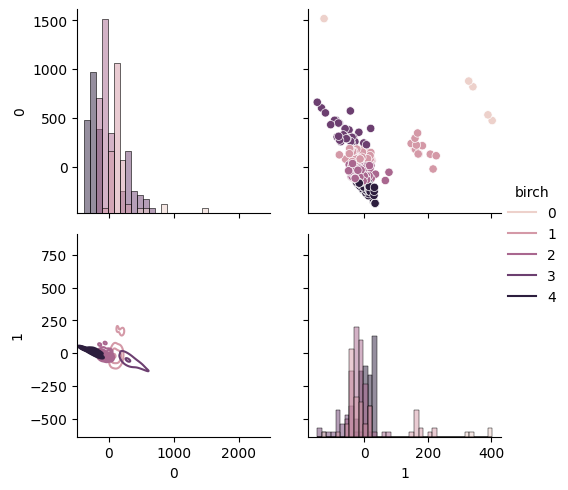

In [72]:
g = sns.PairGrid(df_pca_2_clusters[[0,1,'birch']], hue='birch')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()
g

In [74]:
print(silhouette_score(df_pca_clusters[[0, 1, 3]], df_pca_clusters['kmeans']))
print(calinski_harabasz_score(df_pca_clusters[[0, 1, 3]], df_pca_clusters['kmeans']))
print(davies_bouldin_score(df_pca_clusters[[0, 1, 3]], df_pca_clusters['kmeans']))

0.4721615790853918
342.7245302560892
0.7072358826463196


In [15]:
print(silhouette_score(df_pca_2_clusters[[0,1]], df_pca_clusters['birch']))

print(calinski_harabasz_score(df_pca_2_clusters[[0,1]], df_pca_clusters['birch']))

print(davies_bouldin_score(df_pca_2_clusters[[0,1]], df_pca_clusters['birch']))

0.44329794690678814
316.51387759766084
0.760740022704901


Опишу сразу всё в одной ячейке, их точность оказалась практически идентичной, хотя и процент схождения немного уменьшился, так что наилучшей моделями оказались первые две, не могу определится какая лучше, просто обе примерно одинаково плохи, хотя это конкретно в моих руках всё так плохо)